In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
mc_df=pd.read_excel("mcdonalds.xlsx")

In [35]:
mc_df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [36]:
mc_df.tail(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [37]:
# Convert first 11 columns to binary matrix
MD_x = mc_df.iloc[:, 0:11].apply(lambda x: (x == "Yes") + 0)

# Calculate column means and round to 2 decimal places
col_means = round(MD_x.mean(), 2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [38]:
from sklearn.decomposition import PCA

# Perform PCA on binary matrix
MD_pca = PCA().fit(MD_x)

# Print explained variance ratio and cumulative explained variance
print("Explained variance ratio:")
print(MD_pca.explained_variance_ratio_)
print("\nCumulative explained variance:")
print(np.cumsum(MD_pca.explained_variance_ratio_))

Explained variance ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative explained variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


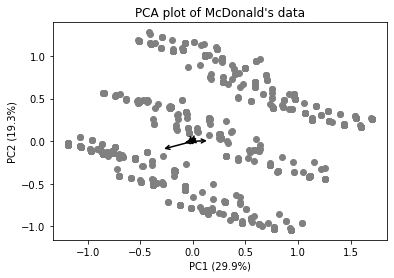

In [39]:
import matplotlib.pyplot as plt

# Calculate PCA scores
MD_pca_scores = MD_pca.transform(MD_x)

# Plot PCA scores
plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], c="grey")

# Overlay principal axes
for length, vector in zip(MD_pca.explained_variance_, MD_pca.components_):
    arrowprops=dict(arrowstyle='->', linewidth=1.5,
                    shrinkA=0, shrinkB=0, color='black')
    plt.annotate('', xy=(vector[0]*length, vector[1]*length),
                 xytext=(0,0), arrowprops=arrowprops)

# Add axis labels and title
plt.xlabel("PC1 ({:.1%})".format(MD_pca.explained_variance_ratio_[0]))
plt.ylabel("PC2 ({:.1%})".format(MD_pca.explained_variance_ratio_[1]))
plt.title("PCA plot of McDonald's data")

# Show plot
plt.show()

In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from itertools import permutations

# Set random seed
np.random.seed(1234)

# Define stepFlexclust function
def stepFlexclust(data, krange, nrep, verbose):
    results = []
    for k in krange:
        best_ari = -1
        best_kmeans = None
        for i in range(nrep):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(data)
            ari = adjusted_rand_score(kmeans.labels_, kmeans.predict(data))
            if ari > best_ari:
                best_ari = ari
                best_kmeans = kmeans
        results.append(best_kmeans)
        if verbose:
            print(f"Finished k = {k}")
    return results
